<div style="text-align: center;">
    <h1><strong>AMCAT Data Analysis</strong></h1>
</div>

### Perform Exploratory Data Analysis (EDA) on the data-set given below. Consider Salary as a target variable. 

The detailed description about the dataset can be found here. 

**Dataset Description.**

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

<div style="text-align: center;">
    <strong>Table Description</strong>
</div>

| VARIABLES | TYPE | Description |
|---------|----|-----------|
| ID      | UID | A unique ID to identify a candidate |
| Salary  | Continuous | Annual CTC oﬀered to the candidate (in INR) |
| DOJ | Date | Date of joining the company |
| DOL | Date | Date of leaving the company |
| Designation | Categorical | Designation oﬀered in the job |
| JobCity | Categorical | Location of the job (city) |
| Gender | Categorical | Candidate’s gender |
| DOB | Date | Date of birth of candidate |
| 10percentage | Continuous | Overall marks obtained in grade 10 examinations | 
| 10board | Continuous | The school board whose curriculum the candidate followed in grade 10 |
| 12graduation | Date | Year of graduation - senior year high school |
| 12percentage | Continuous | Overall marks obtained in grade 12 examinations |
| 12board | Date | The school board whose curriculum the candidate followed in grade 12 |
| CollegeID | NA/ID | Unique ID identifying the college which the candidate attended |
| CollegeTier | Categorical | Tier of college |
| Degree | Categorical | Degree obtained/pursued by the candidate |
| Specialization | Categorical | Specialization pursued by the candidate |
| CollegeGPA | Continuous | Aggregate GPA at graduation |
| CollegeCityID | NA/ID | A unique ID to identify the city in which the college is located in |
| CollegeCityTier | Categorical | The tier of the city in which the college is located |
| CollegeState | Categorical | Name of States |
| GraduationYear | Date | Year of graduation (Bachelor’s degree) |
| English | Continuous | Scores in AMCAT English section |
| Logical | Continuous | Scores in AMCAT Logical section |
| Quant | Continuous | Scores in AMCAT Quantitative section |
| Domain | Continuous/ Standardized | Scores in AMCAT’s domain module |
| ComputerProgramming | Continuous | Score in AMCAT’s Computer programming section |
| ElectronicsAndSemicon | Continuous | Score in AMCAT’s Electronics & Semiconductor Engineering section |
| ComputerScience | Continuous | Score in AMCAT’s Computer Science section |
| MechanicalEngg | Continuous | Score in AMCAT’s Mechanical Engineering section |
| ElectricalEngg | Continuous | Score in AMCAT’s Electrical Engineering section |
| TelecomEngg | Continuous | Score in AMCAT’s Telecommunication Engineering section |
| CivilEngg | Continuous | Score in AMCAT’s Civil Engineering section |
| conscientiousness | Continuous/ Standardized | Scores in one of the sections of AMCAT’s personality test |
| agreeableness | Continuous/ Standardized | Scores in one of the sections of AMCAT’s personality test | 
| extraversion | Continuous/ Standardized | Scores in one of the sections of AMCAT’s personality test |
| neuroticism | Continuous/ Standardized | Scores in one of the sections of AMCAT’s personality test |
| openess_to_experience | Continuous/ Standardized | Scores in one of the sections of AMCAT’s personality test |

 


In [193]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import chi2_contingency, f_oneway, ttest_ind

from datetime import datetime



In [125]:
df = pd.read_csv('data.xlsx - Sheet1.csv')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


## Data Understanding

In [126]:
df.shape

(3998, 39)

There are 3998 rows and 39 columns.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

There are 11 categorical columns and 27 numerical columns.

In [128]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

There are no null values in any of the columns.

In [130]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3993    False
3994    False
3995    False
3996    False
3997    False
Length: 3998, dtype: bool

There are no duplicate values in any of the columns.

In [131]:
# Five-Point-Summary

df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


## Data Cleaning

In [133]:
df['Unnamed: 0'].value_counts()

train    3998
Name: Unnamed: 0, dtype: int64

In [134]:
# Dropping column Unnamed: 0 as it has the same category throughout the dataset and there is no data description of this column

df.drop(columns=['Unnamed: 0'],inplace=True)

In [135]:
# Converting date of joining column to data time format

df['DOJ'] = pd.to_datetime(df['DOJ'])

In [136]:
# Using lambda function to convert date values to left

df['DOL']

0            present
1            present
2            present
3            present
4        3/1/15 0:00
            ...     
3993    10/1/12 0:00
3994     7/1/13 0:00
3995         present
3996     1/1/15 0:00
3997         present
Name: DOL, Length: 3998, dtype: object

In [10]:
df['Working Status'] = df['DOL'].apply(lambda x: current_datetime if x == 'present' else pd.to_datetime(x))

In [11]:
# Converting date of joining column to data time format

df['DOB'] = pd.to_datetime(df['DOB'])

In [17]:
# It is a categorical column with numeric values

df['CollegeTier'].value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

In [16]:
df['CollegeCityTier'].value_counts()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

### Univariate Analysis

In [13]:
num = df.select_dtypes(include='number').columns.to_list()
num

['ID',
 'Salary',
 '10percentage',
 '12graduation',
 '12percentage',
 'CollegeID',
 'CollegeTier',
 'collegeGPA',
 'CollegeCityID',
 'CollegeCityTier',
 'GraduationYear',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [29]:
scores = [
 '10percentage',
 '12percentage',
 'collegeGPA',
 'English',
 'Logical',
 'Quant',
 'Domain',
 'ComputerProgramming',
 'ElectronicsAndSemicon',
 'ComputerScience',
 'MechanicalEngg',
 'ElectricalEngg',
 'TelecomEngg',
 'CivilEngg',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'nueroticism',
 'openess_to_experience']

In [28]:
num_col = ['Salary', '12graduation', 'GraduationYear', 'CollegeTier', 'CollegeCityTier']

In [59]:
cat = df.select_dtypes(include='object').columns.to_list()
cat

['Designation',
 'JobCity',
 'Gender',
 '10board',
 '12board',
 'Degree',
 'Specialization',
 'CollegeState']

### STATISTICAL ANALYSIS

#### Measure of central tendency

In [36]:
# Mean

df['Salary'].mean()

307699.8499249625

In [37]:
# Median

df['Salary'].median()

300000.0

In [35]:
# Mode

for i in num_col:
    print('The mode value of the columns',i,'is',df[i].mode()[0])

The mode value of the columns Salary is 300000.0
The mode value of the columns 12graduation is 2009
The mode value of the columns GraduationYear is 2013
The mode value of the columns CollegeTier is 2
The mode value of the columns CollegeCityTier is 0


In [30]:
# Mean

for i in scores:
    print('The mean value of the columns',i,'is',df[i].mean())

The mean value of the columns 10percentage is 77.9254427213607
The mean value of the columns 12percentage is 74.46636568284141
The mean value of the columns collegeGPA is 71.48617058529265
The mean value of the columns English is 501.64907453726863
The mean value of the columns Logical is 501.59879939969983
The mean value of the columns Quant is 513.3781890945472
The mean value of the columns Domain is 0.5104896530031996
The mean value of the columns ComputerProgramming is 353.10280140070034
The mean value of the columns ElectronicsAndSemicon is 95.32841420710355
The mean value of the columns ComputerScience is 90.7423711855928
The mean value of the columns MechanicalEngg is 22.97473736868434
The mean value of the columns ElectricalEngg is 16.478739369684842
The mean value of the columns TelecomEngg is 31.851175587793897
The mean value of the columns CivilEngg is 2.68384192096048
The mean value of the columns conscientiousness is -0.03783129064532267
The mean value of the columns agree

In [31]:
# Median

for i in scores:
    print('The median value of the columns',i,'is',df[i].median())

The median value of the columns 10percentage is 79.15
The median value of the columns 12percentage is 74.4
The median value of the columns collegeGPA is 71.72
The median value of the columns English is 500.0
The median value of the columns Logical is 505.0
The median value of the columns Quant is 515.0
The median value of the columns Domain is 0.6226429158
The median value of the columns ComputerProgramming is 415.0
The median value of the columns ElectronicsAndSemicon is -1.0
The median value of the columns ComputerScience is -1.0
The median value of the columns MechanicalEngg is -1.0
The median value of the columns ElectricalEngg is -1.0
The median value of the columns TelecomEngg is -1.0
The median value of the columns CivilEngg is -1.0
The median value of the columns conscientiousness is 0.0464
The median value of the columns agreeableness is 0.2124
The median value of the columns extraversion is 0.0914
The median value of the columns nueroticism is -0.2344
The median value of the 

In [32]:
# Mode

for i in scores:
    print('The mode value of the columns',i,'is',df[i].mode()[0])

The mode value of the columns 10percentage is 78.0
The mode value of the columns 12percentage is 70.0
The mode value of the columns collegeGPA is 70.0
The mode value of the columns English is 475
The mode value of the columns Logical is 495
The mode value of the columns Quant is 605
The mode value of the columns Domain is -1.0
The mode value of the columns ComputerProgramming is -1
The mode value of the columns ElectronicsAndSemicon is -1
The mode value of the columns ComputerScience is -1
The mode value of the columns MechanicalEngg is -1
The mode value of the columns ElectricalEngg is -1
The mode value of the columns TelecomEngg is -1
The mode value of the columns CivilEngg is -1
The mode value of the columns conscientiousness is 0.2718
The mode value of the columns agreeableness is 0.3789
The mode value of the columns extraversion is 0.4711
The mode value of the columns nueroticism is -0.4879
The mode value of the columns openess_to_experience is 0.6721


#### Measures of dispersion

In [38]:
for i in scores:
    print('The range value of the columns',i,'is',df[i].max()-df[i].min())

The range value of the columns 10percentage is 54.760000000000005
The range value of the columns 12percentage is 58.7
The range value of the columns collegeGPA is 93.48
The range value of the columns English is 695
The range value of the columns Logical is 600
The range value of the columns Quant is 780
The range value of the columns Domain is 1.9999104076
The range value of the columns ComputerProgramming is 841
The range value of the columns ElectronicsAndSemicon is 613
The range value of the columns ComputerScience is 716
The range value of the columns MechanicalEngg is 624
The range value of the columns ElectricalEngg is 677
The range value of the columns TelecomEngg is 549
The range value of the columns CivilEngg is 517
The range value of the columns conscientiousness is 6.122
The range value of the columns agreeableness is 7.6864
The range value of the columns extraversion is 7.1363
The range value of the columns nueroticism is 5.9955
The range value of the columns openess_to_exp

In [39]:
for i in scores:
    print('The Maximum value of the columns',i,'is',df[i].max())

The range value of the columns 10percentage is 97.76
The range value of the columns 12percentage is 98.7
The range value of the columns collegeGPA is 99.93
The range value of the columns English is 875
The range value of the columns Logical is 795
The range value of the columns Quant is 900
The range value of the columns Domain is 0.9999104076
The range value of the columns ComputerProgramming is 840
The range value of the columns ElectronicsAndSemicon is 612
The range value of the columns ComputerScience is 715
The range value of the columns MechanicalEngg is 623
The range value of the columns ElectricalEngg is 676
The range value of the columns TelecomEngg is 548
The range value of the columns CivilEngg is 516
The range value of the columns conscientiousness is 1.9953
The range value of the columns agreeableness is 1.9048
The range value of the columns extraversion is 2.5354
The range value of the columns nueroticism is 3.3525
The range value of the columns openess_to_experience is 1

In [40]:
for i in scores:
    print('The Minimum value of the columns',i,'is',df[i].min())

The range value of the columns 10percentage is 43.0
The range value of the columns 12percentage is 40.0
The range value of the columns collegeGPA is 6.45
The range value of the columns English is 180
The range value of the columns Logical is 195
The range value of the columns Quant is 120
The range value of the columns Domain is -1.0
The range value of the columns ComputerProgramming is -1
The range value of the columns ElectronicsAndSemicon is -1
The range value of the columns ComputerScience is -1
The range value of the columns MechanicalEngg is -1
The range value of the columns ElectricalEngg is -1
The range value of the columns TelecomEngg is -1
The range value of the columns CivilEngg is -1
The range value of the columns conscientiousness is -4.1267
The range value of the columns agreeableness is -5.7816
The range value of the columns extraversion is -4.6009
The range value of the columns nueroticism is -2.643
The range value of the columns openess_to_experience is -7.3757


In [41]:
df['Salary'].max() - df['Salary'].min()

3965000.0

In [42]:
df['Salary'].max()

4000000.0

In [43]:
df['Salary'].min()

35000.0

#### Skewness

In [44]:
for i in num:
    print('The skewness value of the columns',i,'is',df[i].skew())

The skewness value of the columns ID is 0.05477046850906638
The skewness value of the columns Salary is 6.451081166224832
The skewness value of the columns 10percentage is -0.5910185081648047
The skewness value of the columns 12graduation is -0.9640901430967733
The skewness value of the columns 12percentage is -0.03260741437482245
The skewness value of the columns CollegeID is 0.649176333927607
The skewness value of the columns CollegeTier is -3.2479906747351404
The skewness value of the columns collegeGPA is -1.2492091640381637
The skewness value of the columns CollegeCityID is 0.649176333927607
The skewness value of the columns CollegeCityTier is 0.8711203104937956
The skewness value of the columns GraduationYear is -63.06806402522399
The skewness value of the columns English is 0.1919970174188361
The skewness value of the columns Logical is -0.21660181091305136
The skewness value of the columns Quant is -0.01939903459277611
The skewness value of the columns Domain is -1.922145563411

#### Kurtosis

In [46]:
for i in num:
    print('The kurtosis value of the columns',i,'is',df[i].kurt())

The kurtosis value of the columns ID is -1.2226938327845243
The kurtosis value of the columns Salary is 80.92999627162538
The kurtosis value of the columns 10percentage is -0.1102843100198605
The kurtosis value of the columns 12graduation is 1.9511644059905469
The kurtosis value of the columns 12percentage is -0.6307374665885321
The kurtosis value of the columns CollegeID is -0.7674413638286568
The kurtosis value of the columns CollegeTier is 8.553722173976427
The kurtosis value of the columns collegeGPA is 10.234244459804753
The kurtosis value of the columns CollegeCityID is -0.7674413638286568
The kurtosis value of the columns CollegeCityTier is -1.2417708510593095
The kurtosis value of the columns GraduationYear is 3984.3696957519783
The kurtosis value of the columns English is -0.2541325252956774
The kurtosis value of the columns Logical is -0.2247605173210978
The kurtosis value of the columns Quant is -0.10247207606308217
The kurtosis value of the columns Domain is 3.8959505720341

#### Frequency

In [75]:
for i in cat:
    print(f'The frequency of the columns{i}is\n{df[i].value_counts()}\n')
    print()
    print('*****')
    print()

The frequency of the columnsDesignationis
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64


*****

The frequency of the columnsJobCityis
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64


*****

The frequency of the columnsGenderis
m    3041
f     957
Name: Gender, dtype: int64


*****

The freq

### Plots

#### Box-Plot

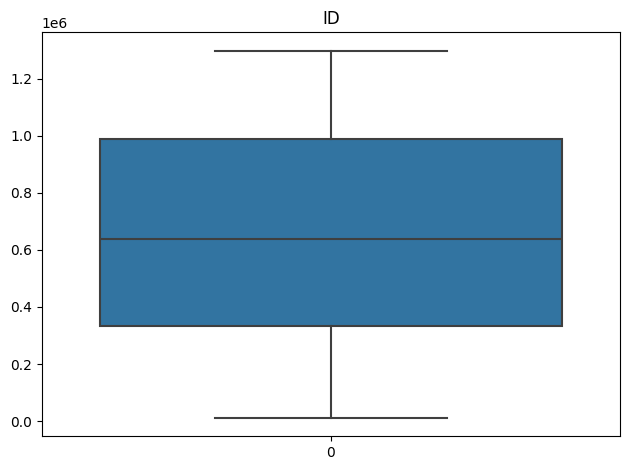

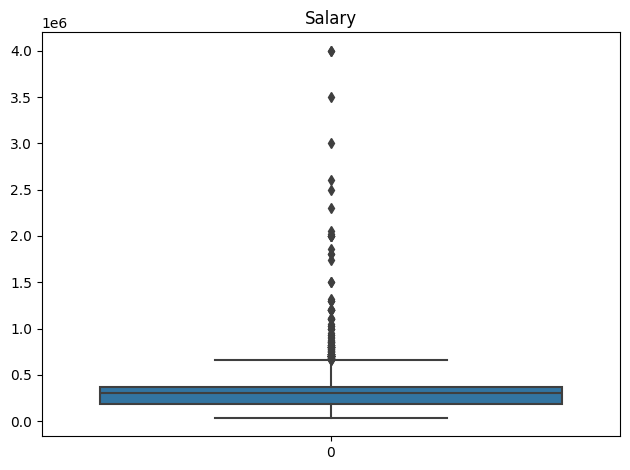

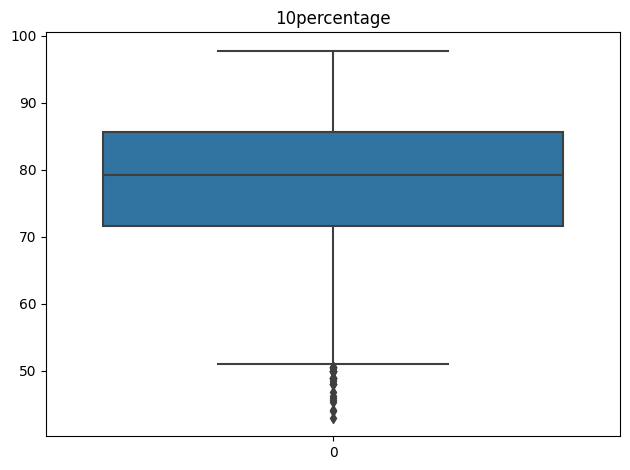

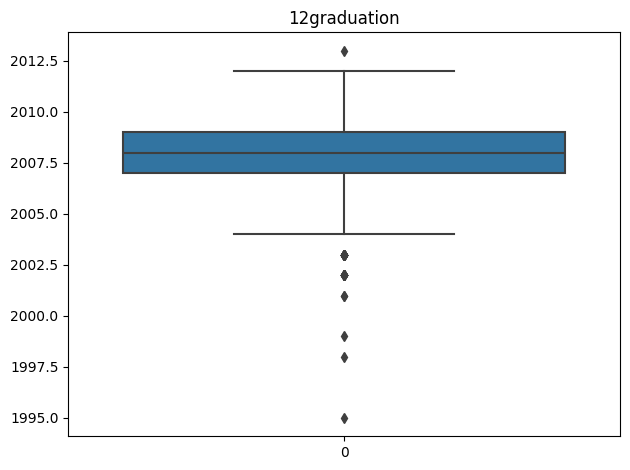

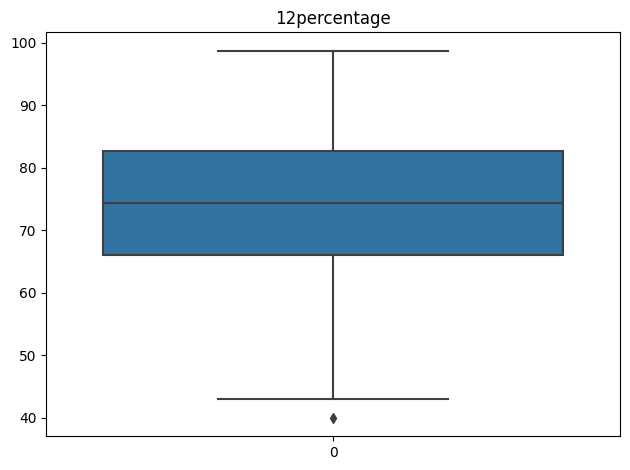

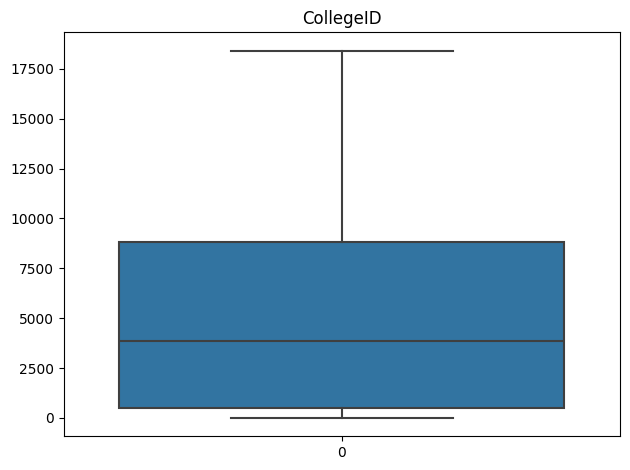

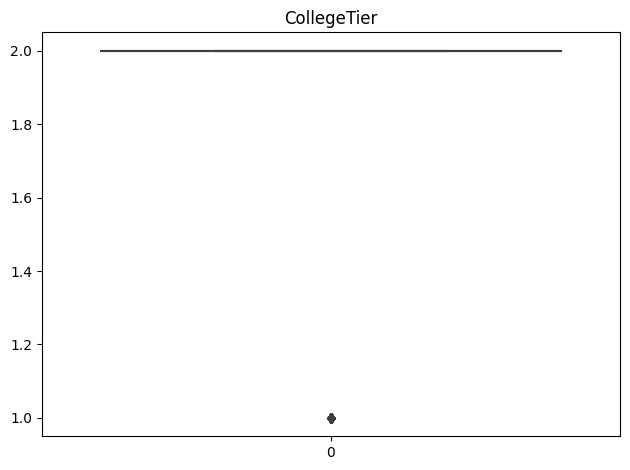

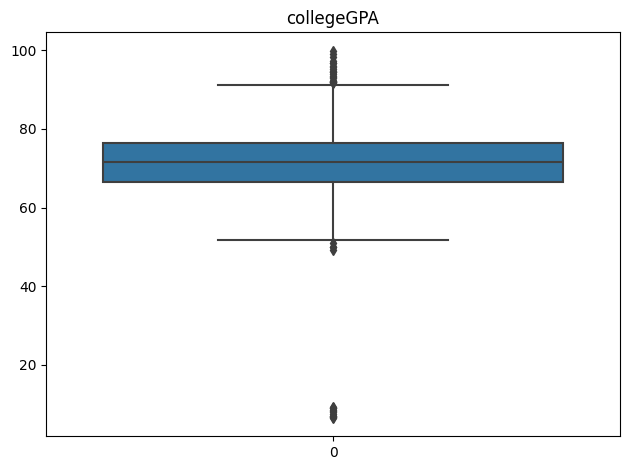

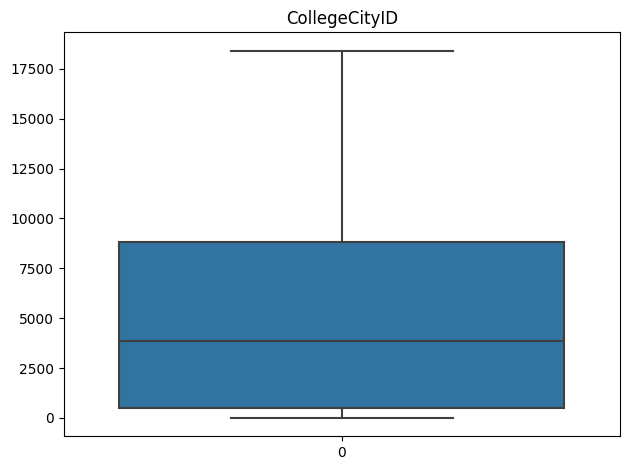

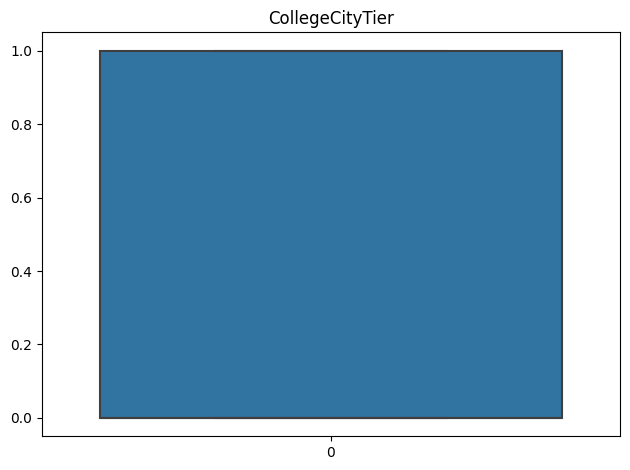

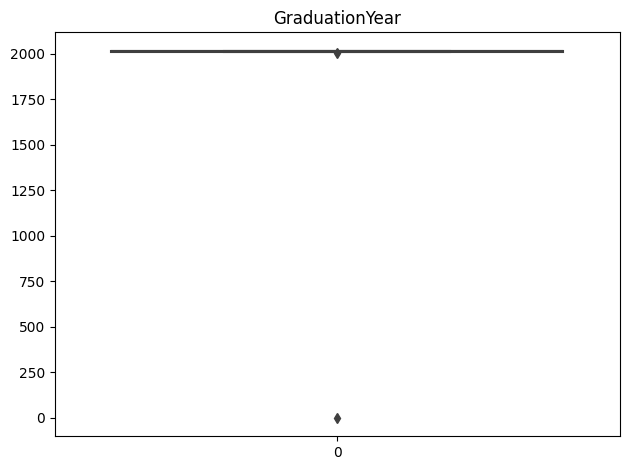

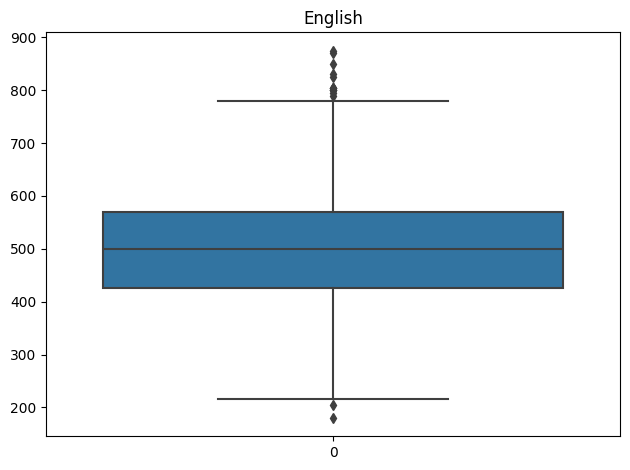

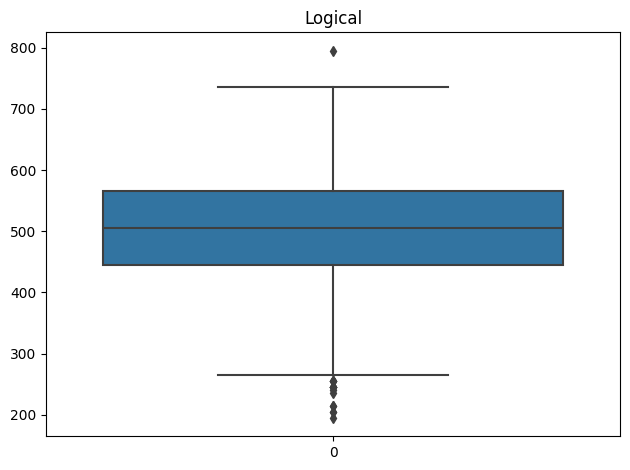

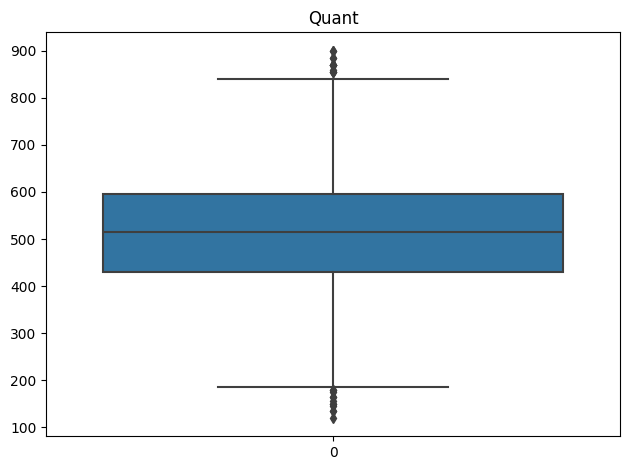

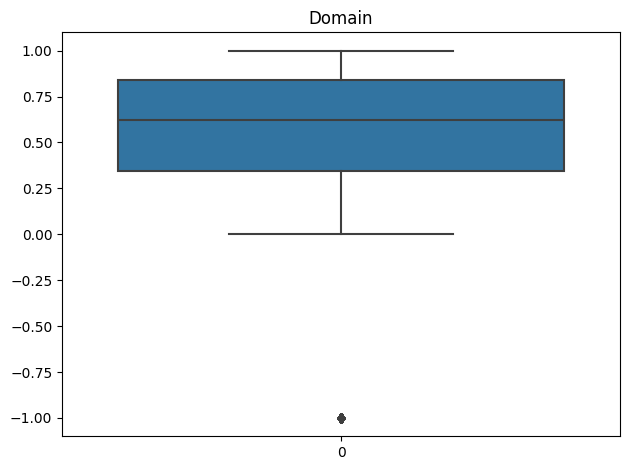

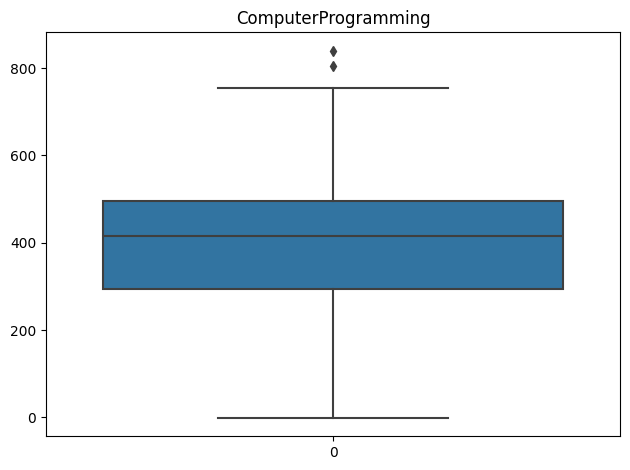

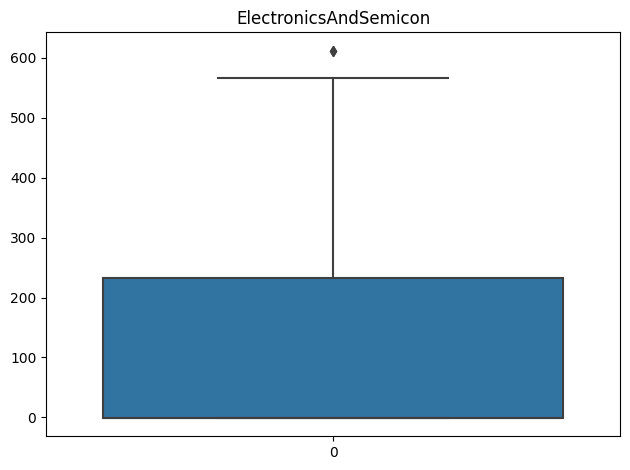

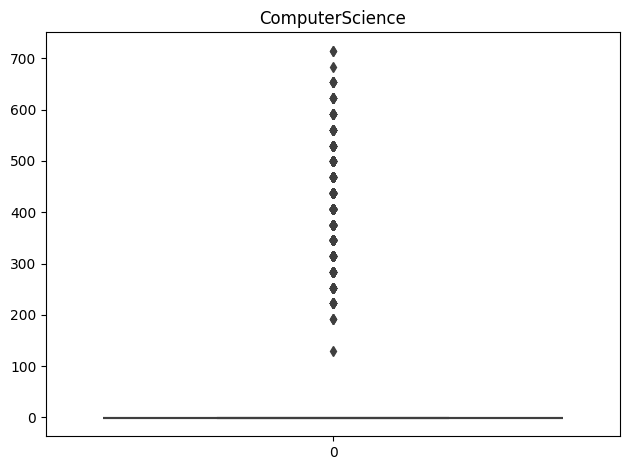

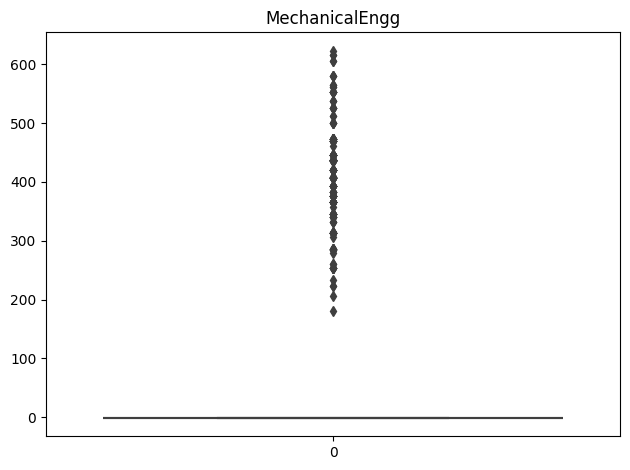

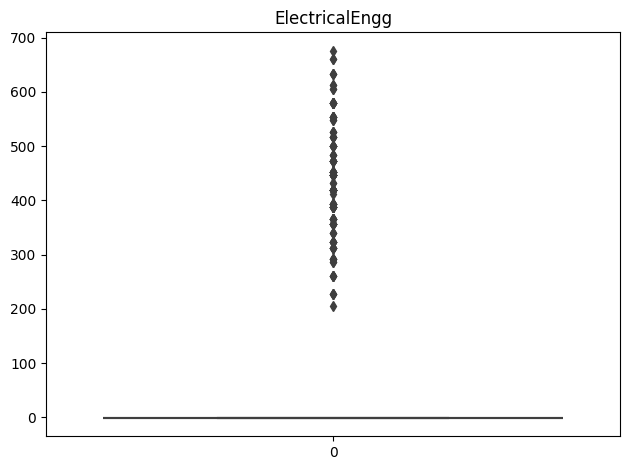

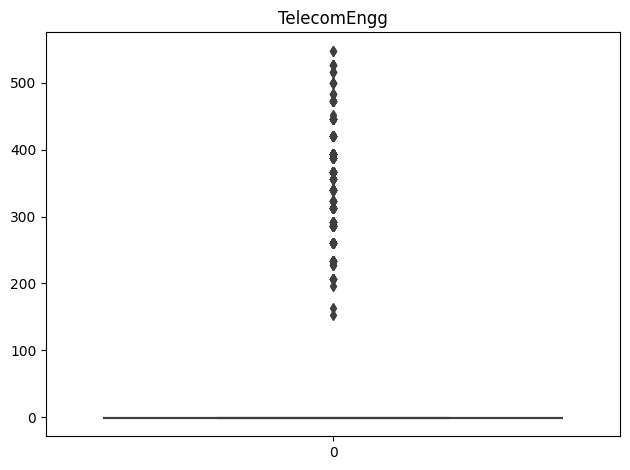

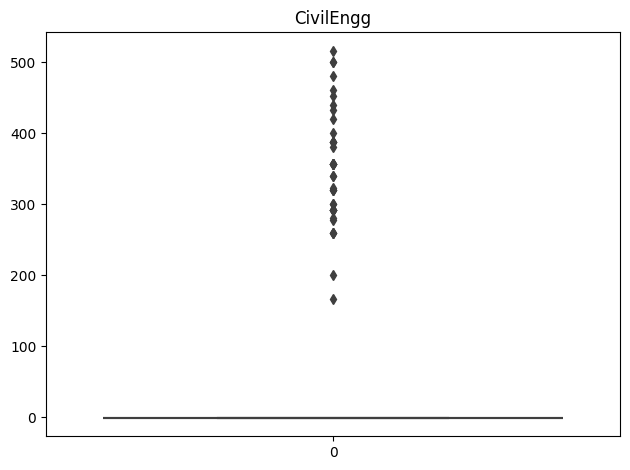

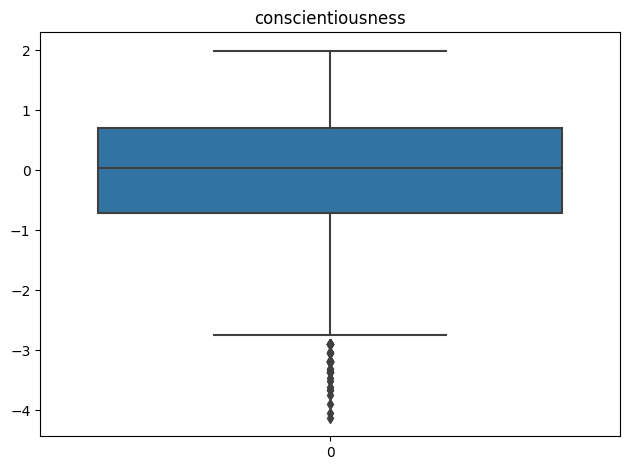

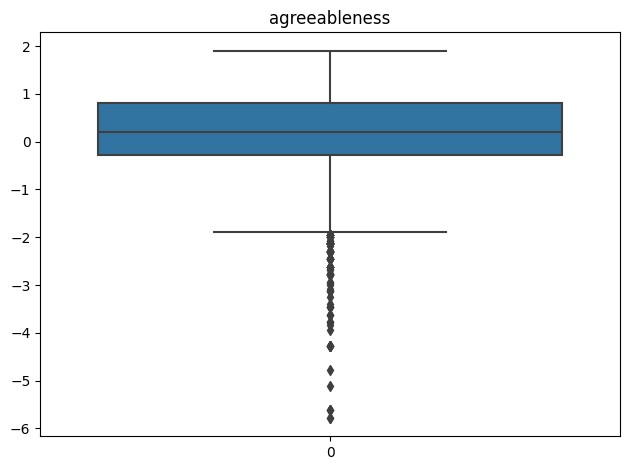

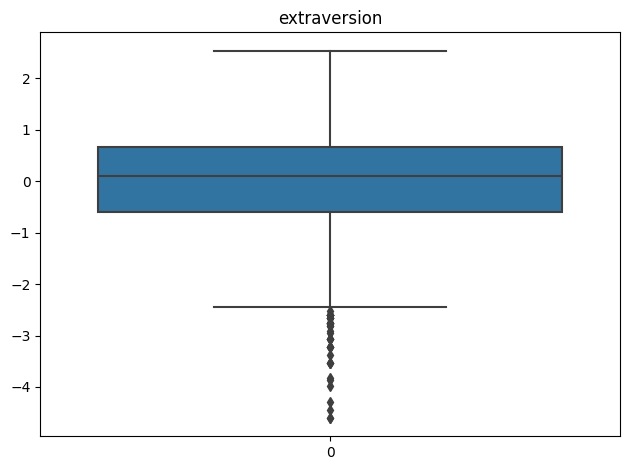

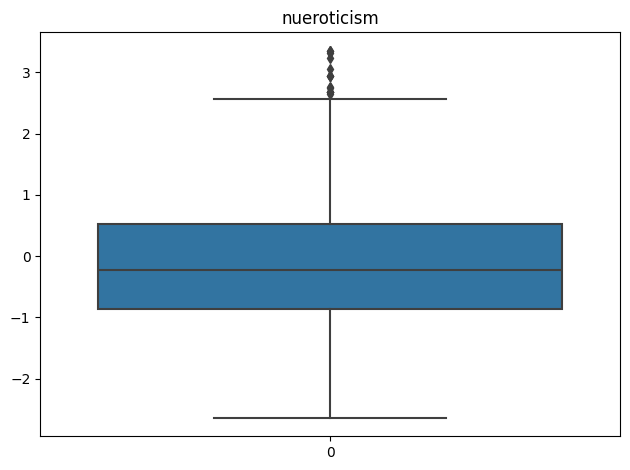

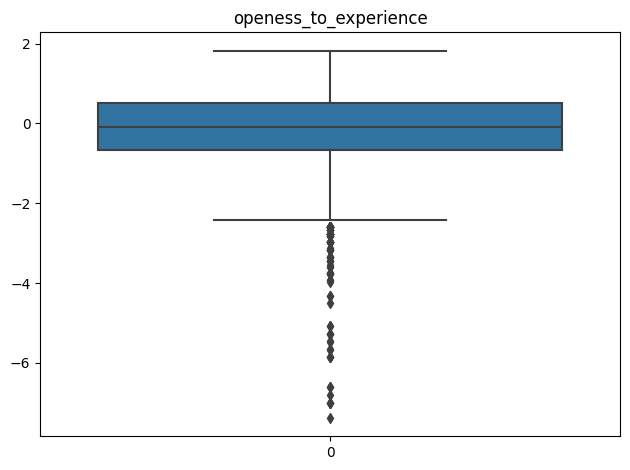

In [66]:
t = 1
for i in num:
    #plt.figure(figsize=[15,10])
    #plt.subplot(4,5,t)
    sns.boxplot(df[i])
    plt.title(i)
    t+=1
    plt.tight_layout()
    plt.show()

#### Histogram

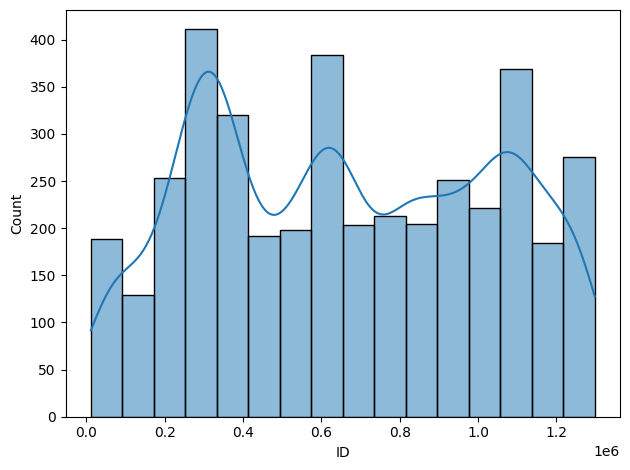

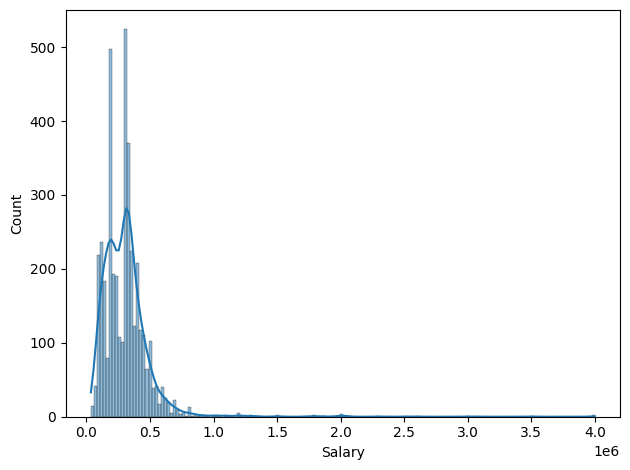

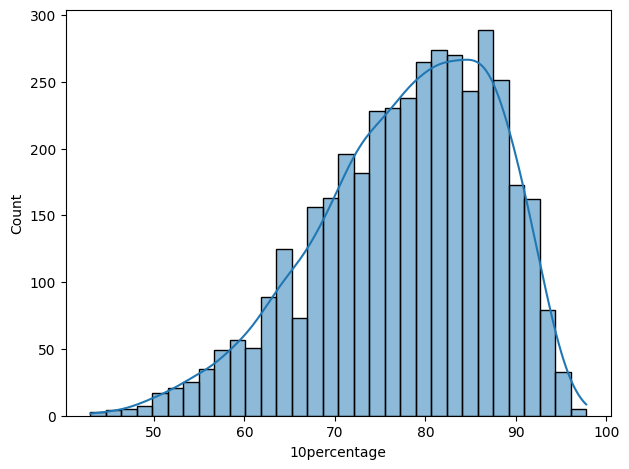

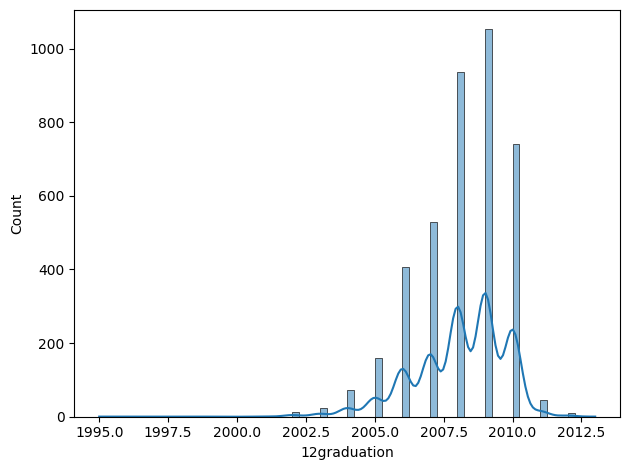

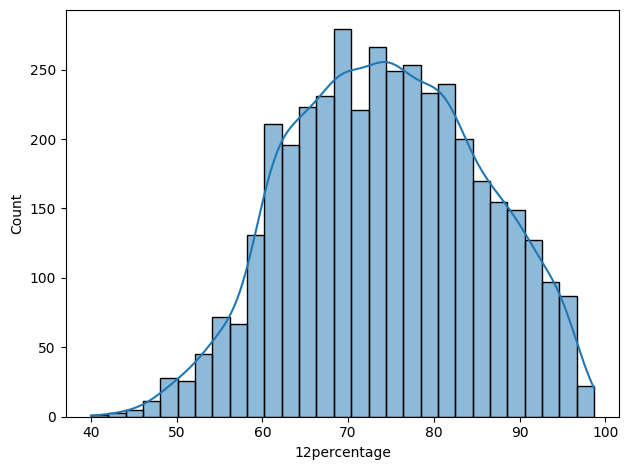

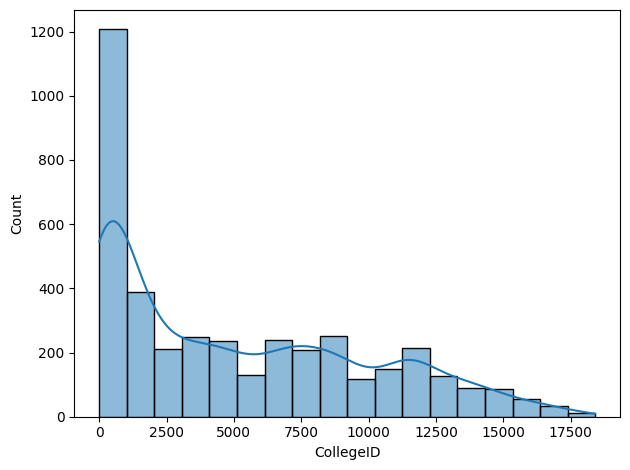

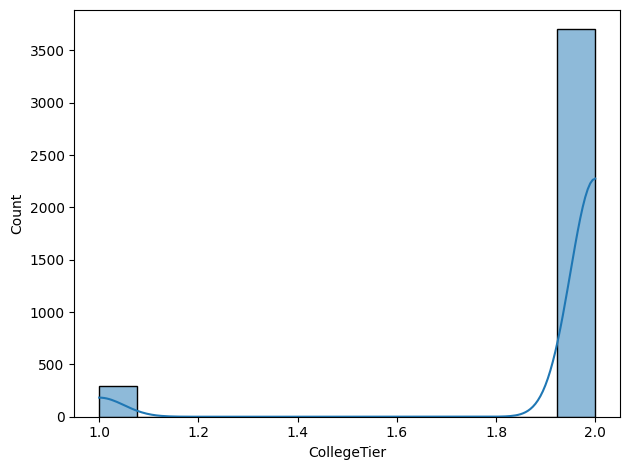

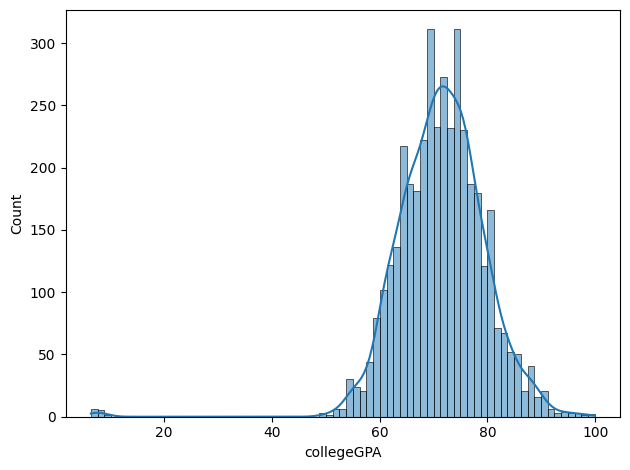

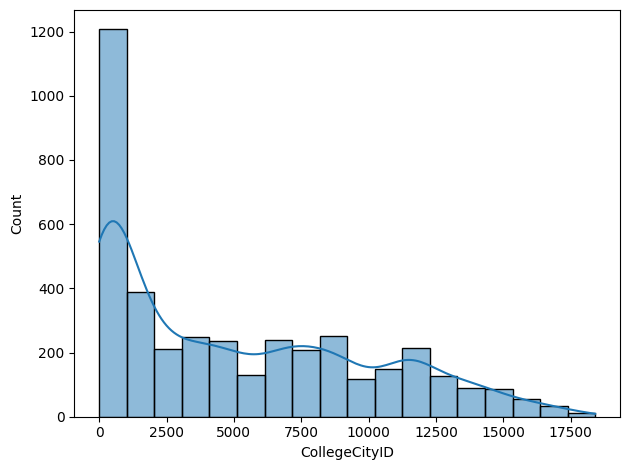

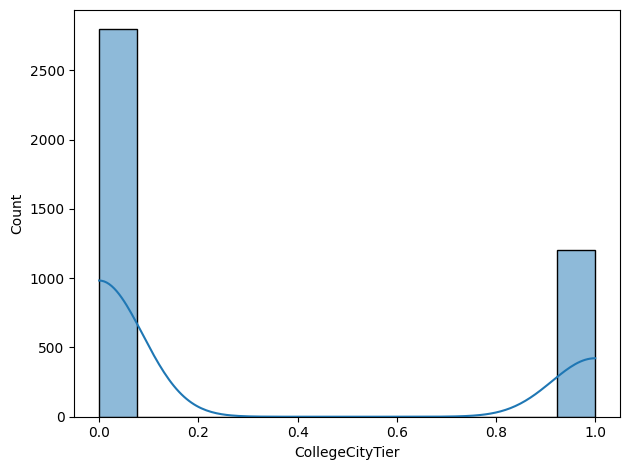

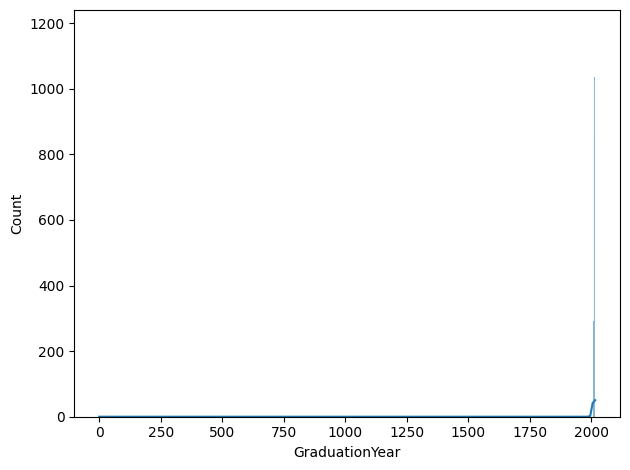

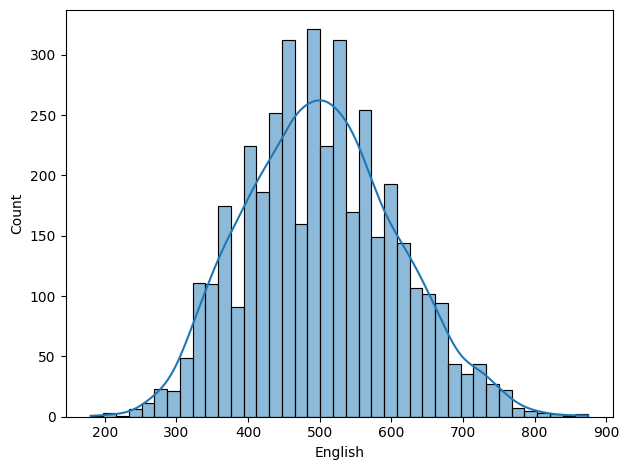

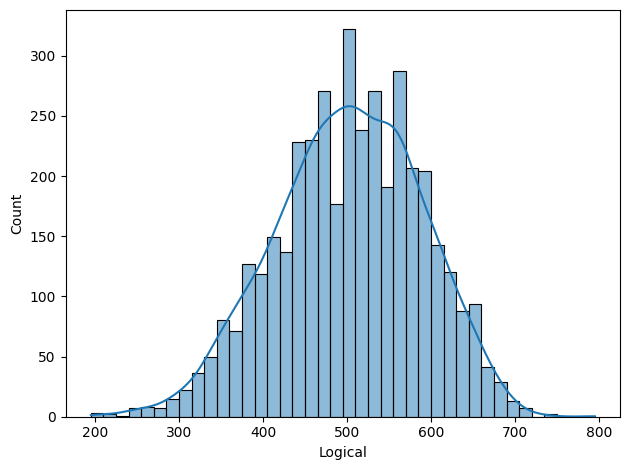

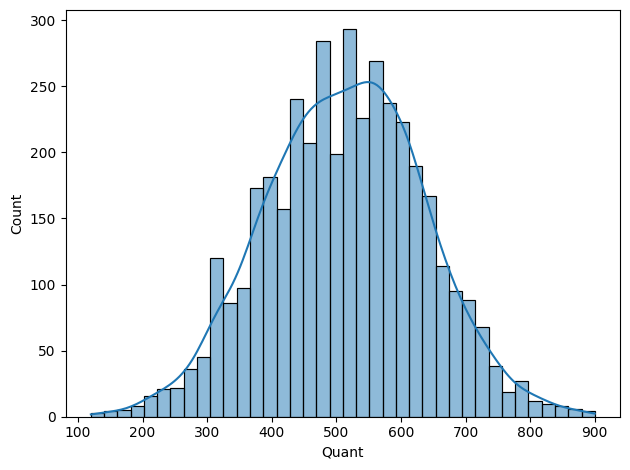

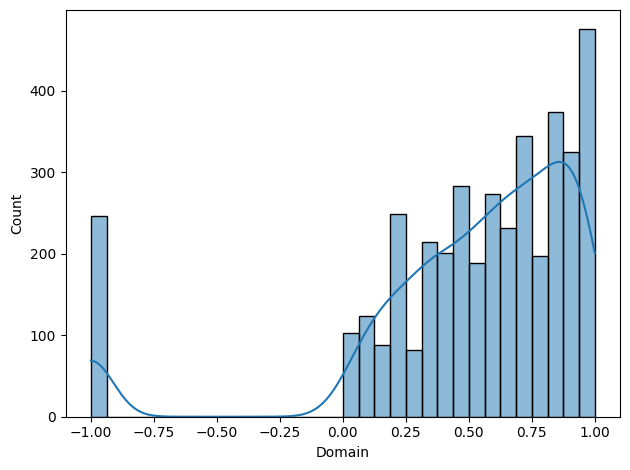

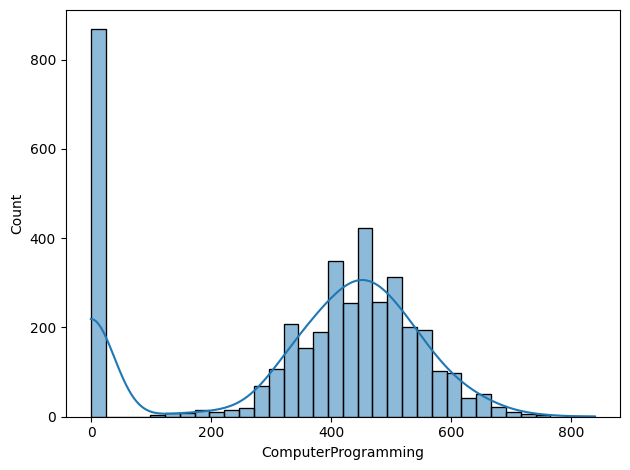

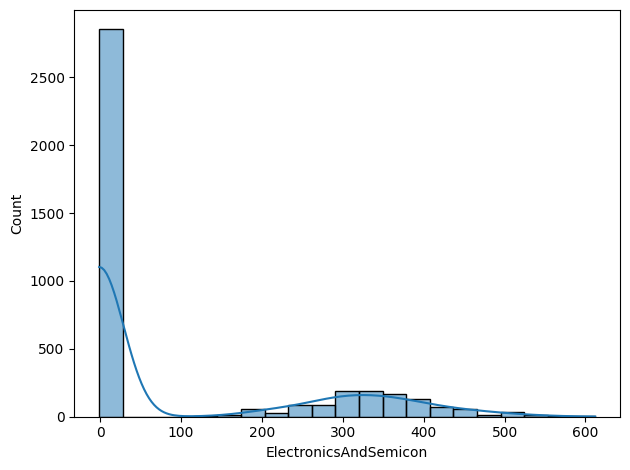

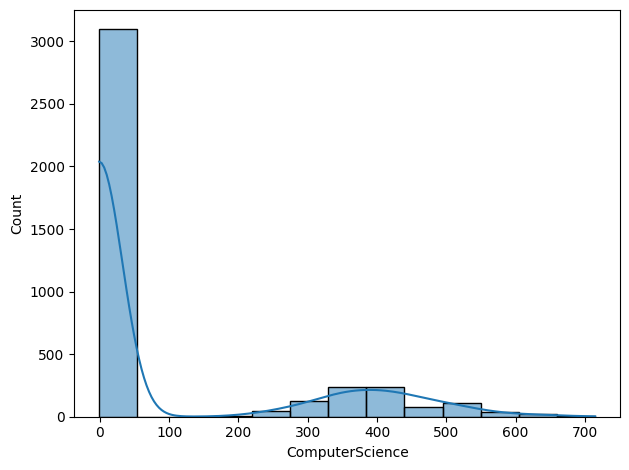

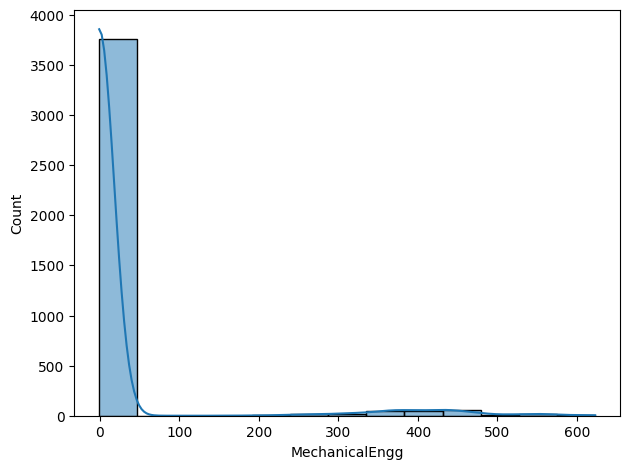

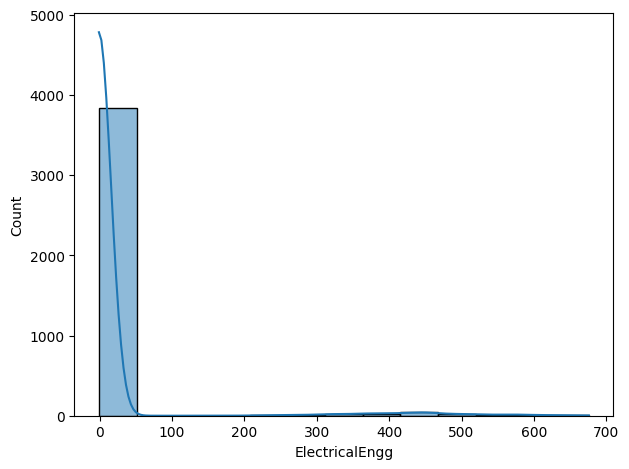

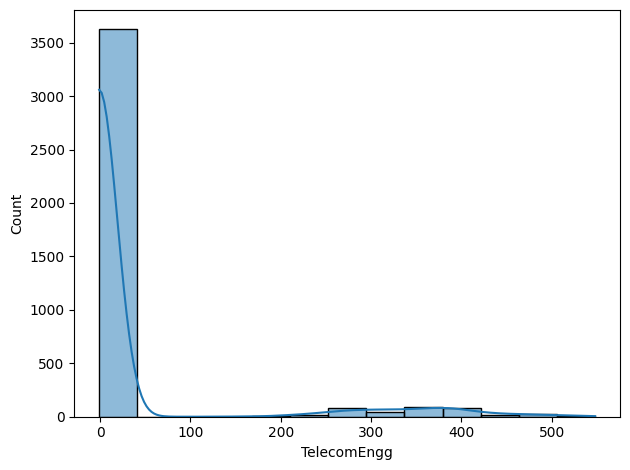

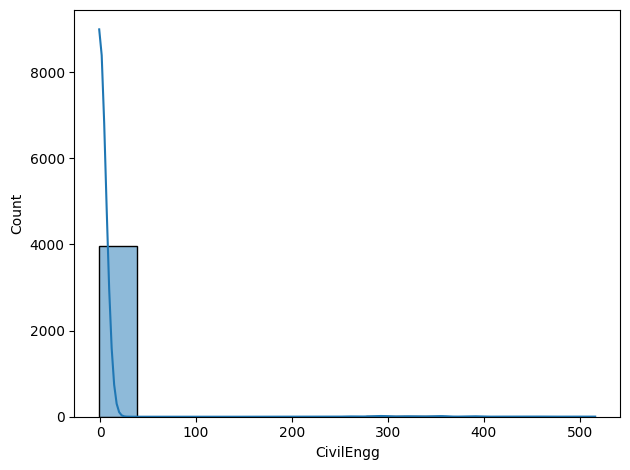

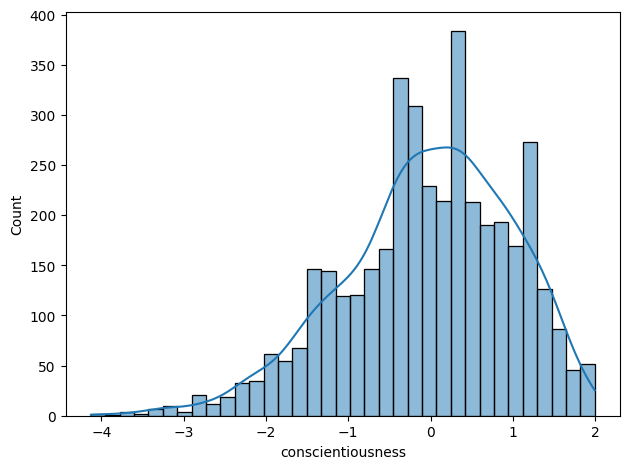

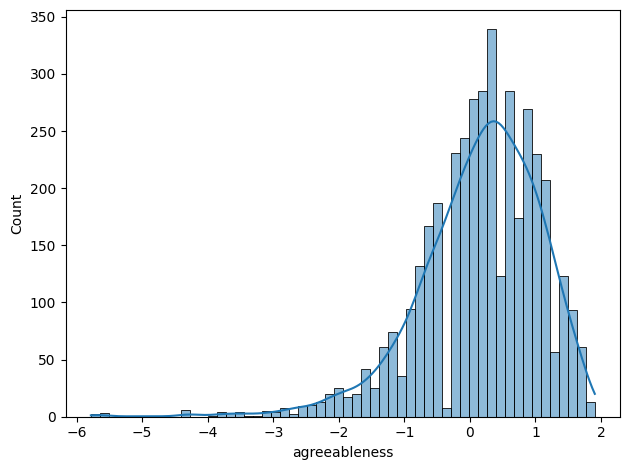

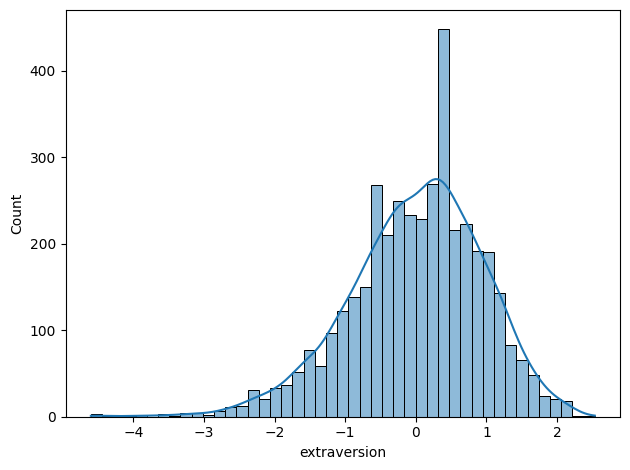

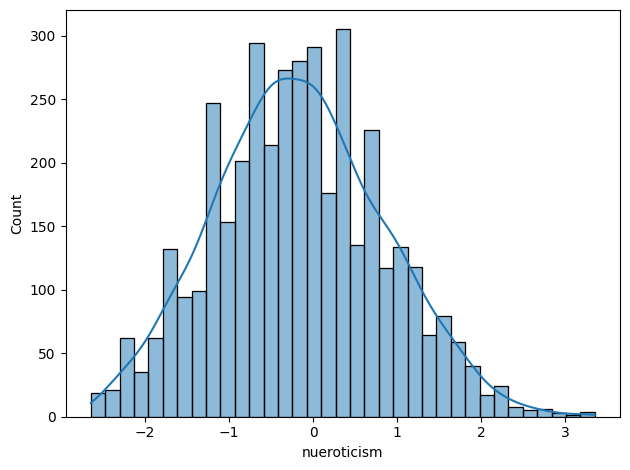

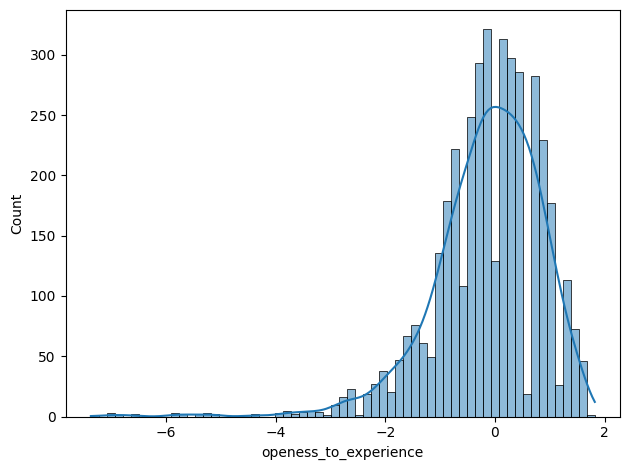

In [55]:
t=1
for i in num:
    #plt.subplot(4,4,t)
    sns.histplot(df[i],kde=True)
    t+=1
    plt.tight_layout()
    plt.show()

#### Count plot

In [91]:
df['Designation'].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

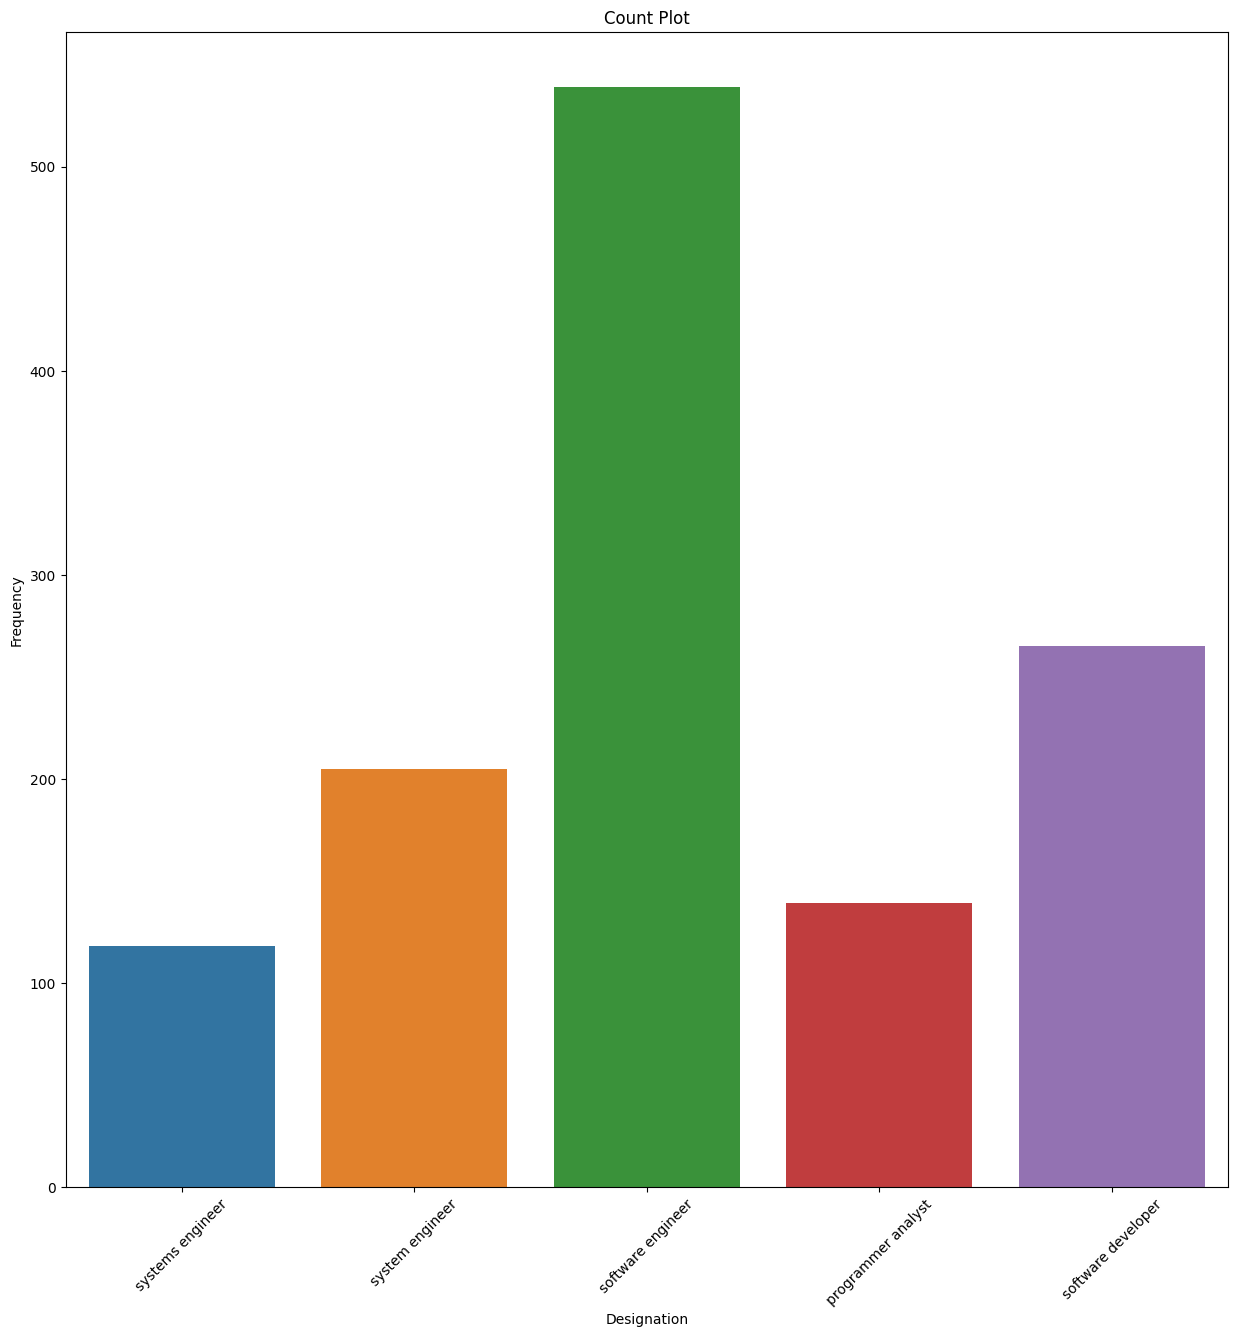

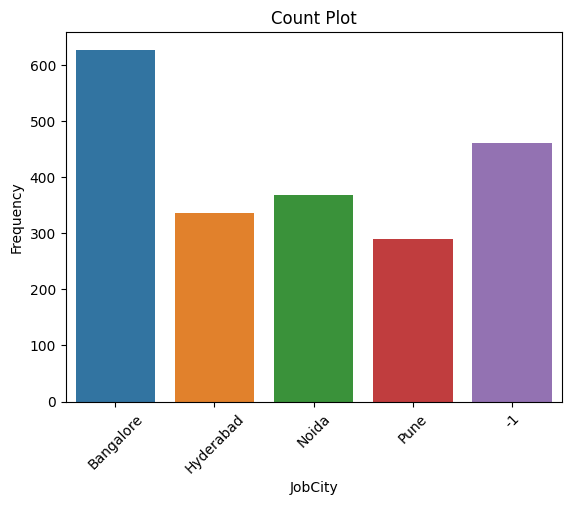

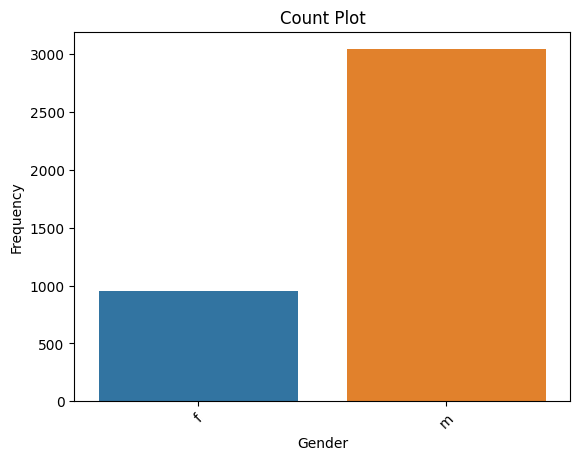

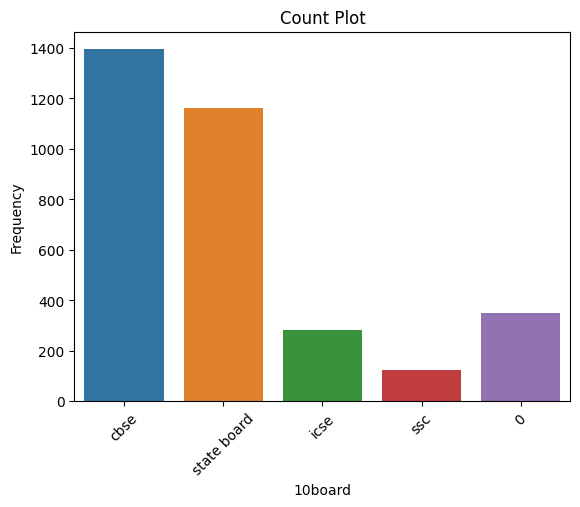

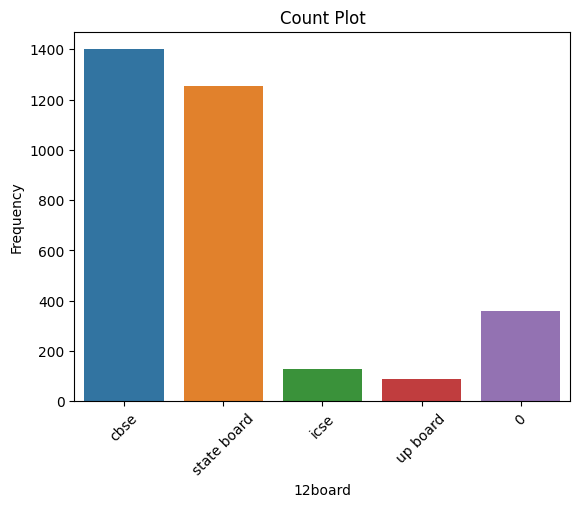

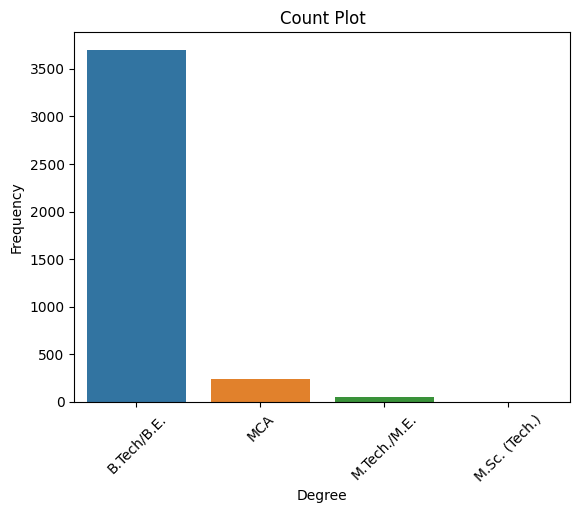

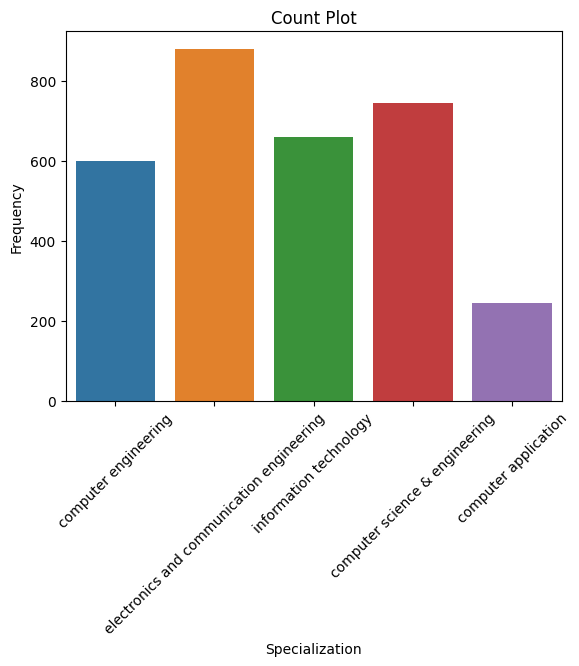

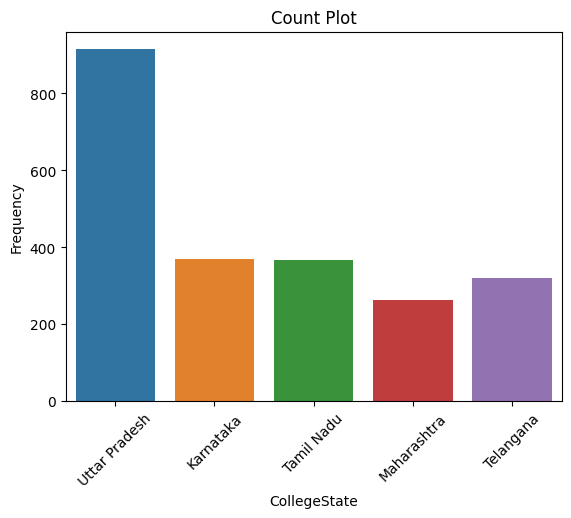

In [92]:
plt.figure(figsize=[15,15])
for i in cat:
    top_5 = df[i].value_counts().nlargest(5).index
    top_5 = df[df[i].isin(top_5)]
    sns.countplot(data=top_5,x=i)
    plt.xlabel(i)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.title('Count Plot')
    plt.show()

<Axes: xlabel='CollegeTier', ylabel='count'>

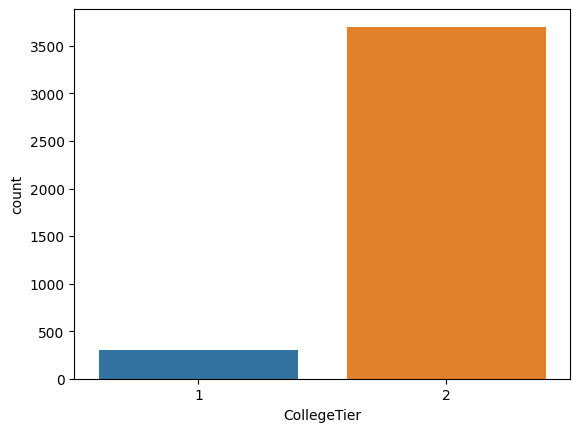

In [84]:
sns.countplot(data=df,x='CollegeTier')

<Axes: xlabel='CollegeCityTier', ylabel='count'>

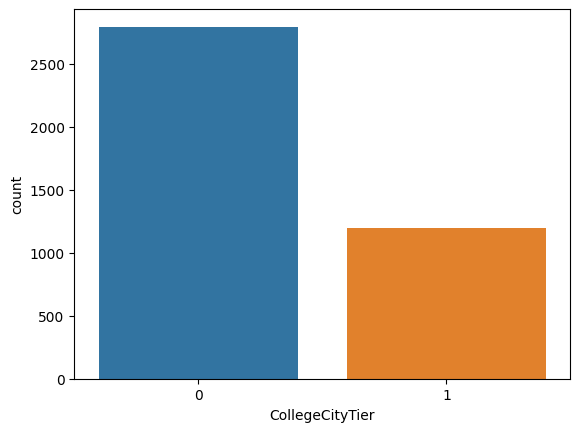

In [85]:
sns.countplot(data=df,x='CollegeCityTier')

### Bivariate Analysis

#### Numerical vs Numerical

#### Correlation

In [77]:
df.corr()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,1.000000,-0.247294,0.044547,0.673102,0.007069,0.284540,0.035160,0.047144,0.284540,-0.035977,...,0.482626,-0.026147,0.104454,-0.049272,-0.017871,0.175557,0.024837,0.120979,-0.146289,0.031359
Salary,-0.247294,1.000000,0.177373,-0.161383,0.170254,-0.118690,-0.179332,0.130103,-0.118690,0.015384,...,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
10percentage,0.044547,0.177373,1.000000,0.269957,0.643378,0.021082,-0.126042,0.312538,0.021082,0.116707,...,-0.018933,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692
12graduation,0.673102,-0.161383,0.269957,1.000000,0.259166,0.254021,0.027691,0.086001,0.254021,-0.003016,...,0.293439,0.035459,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069
12percentage,0.007069,0.170254,0.643378,0.259166,1.000000,0.022336,-0.100771,0.346137,0.022336,0.130462,...,-0.043534,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeTier,0.035160,-0.179332,-0.126042,0.027691,-0.100771,0.067054,1.000000,-0.086781,0.067054,-0.101494,...,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179
collegeGPA,0.047144,0.130103,0.312538,0.086001,0.346137,0.017240,-0.086781,1.000000,0.017240,0.017471,...,0.007601,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071
CollegeCityID,0.284540,-0.118690,0.021082,0.254021,0.022336,1.000000,0.067054,0.017240,1.000000,0.007757,...,0.102303,-0.009291,0.022933,0.025620,0.005749,0.076432,-0.005264,0.005917,-0.008973,-0.010678
CollegeCityTier,-0.035977,0.015384,0.116707,-0.003016,0.130462,0.007757,-0.101494,0.017471,0.007757,1.000000,...,-0.010643,-0.052395,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790


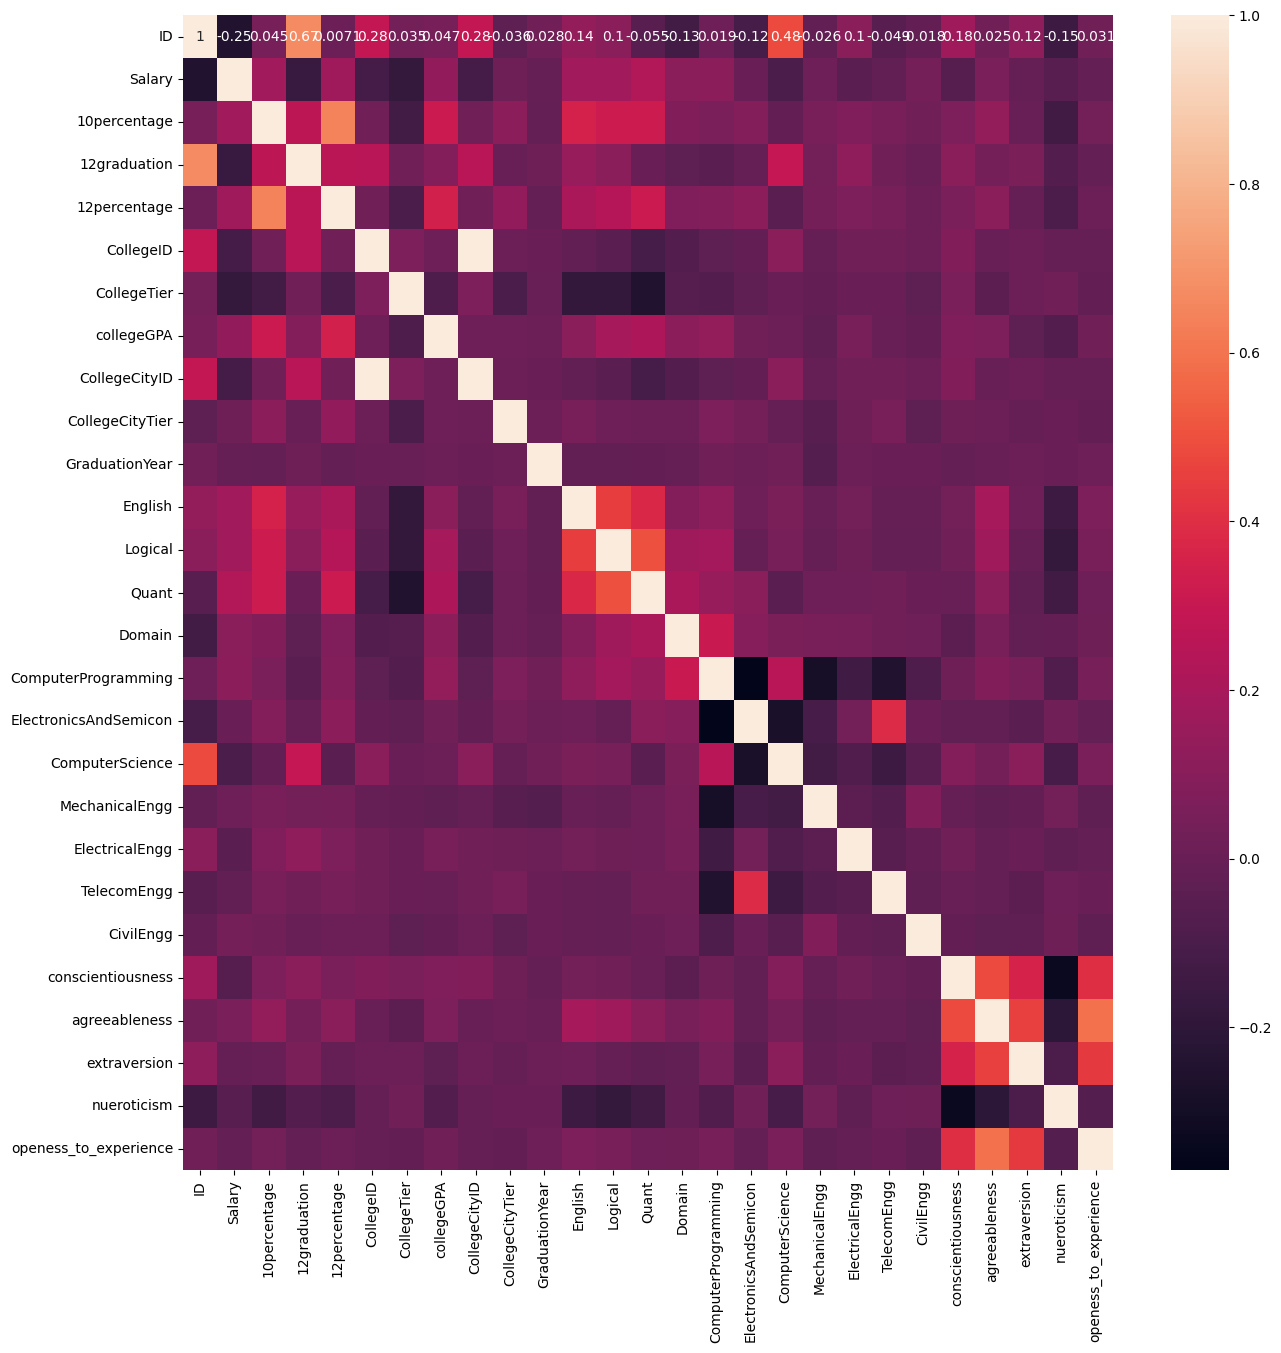

In [76]:
plt.figure(figsize=[15,15])
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Covariance

In [79]:
df.cov()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,1.319275e+11,-1.910842e+10,159378.051803,404276.838583,28243.078928,4.963137e+08,3349.438212,139854.366484,4.963137e+08,-5991.252230,...,3.072515e+07,-931869.041883,3.322958e+06,-1.876479e+06,-237952.207851,65593.400265,8496.058635,41809.257150,-53537.564434,11482.092235
Salary,-1.910842e+10,4.525724e+10,371684.456159,-56771.565543,398412.208861,-1.212565e+08,-10005.790486,226052.995923,-1.212565e+08,1500.495432,...,-3.755551e+06,385652.660706,-8.868903e+05,-5.061435e+05,293530.550489,-14037.983625,11504.821563,-2067.186195,-11721.817357,-2425.975501
10percentage,1.593781e+05,3.716845e+05,97.025700,4.397119,69.710710,9.972611e+02,-0.325618,25.143547,9.972611e+02,0.527071,...,-3.268791e+01,48.678119,6.420377e+01,5.099856e+01,10.833465,0.685534,1.267615,-0.043855,-1.314998,0.364343
12graduation,4.042768e+05,-5.677157e+04,4.397119,2.734391,4.714096,2.017185e+03,0.012009,1.161489,2.017185e+03,-0.002287,...,8.504783e+01,5.753526,1.792305e+01,4.069324e+00,-0.286551,0.175763,0.064135,0.097479,-0.123908,-0.025119
12percentage,2.824308e+04,3.984122e+05,69.710710,4.714096,120.998528,1.179912e+03,-0.290720,31.096999,1.179912e+03,0.657967,...,-8.393252e+01,40.621034,6.166074e+01,5.098068e+01,2.383094,0.659664,1.077373,-0.078347,-1.045919,0.070213
CollegeID,4.963137e+08,-1.212565e+08,997.261052,2017.184639,1179.911862,2.306172e+07,84.454309,676.167910,2.306172e+07,17.079669,...,8.610934e+04,-4378.244435,9.645816e+03,1.290070e+04,1012.081362,377.568165,-23.806085,27.034147,-43.417151,-51.690285
CollegeTier,3.349438e+03,-1.000579e+04,-0.325618,0.012009,-0.290720,8.445431e+01,0.068786,-0.185889,8.445431e+01,-0.012204,...,4.840737e-02,-0.554542,5.959109e-02,1.999373e-04,-0.324218,0.014885,-0.009400,0.002488,0.006284,-0.005071
collegeGPA,1.398544e+05,2.260530e+05,25.143547,1.161489,31.096999,6.761679e+02,-0.185889,66.705404,6.761679e+02,0.065421,...,1.088097e+01,-25.456707,3.738237e+01,-4.475103e+00,-5.673773,0.584587,0.525213,-0.253988,-0.616035,0.231115
CollegeCityID,4.963137e+08,-1.212565e+08,997.261052,2017.184639,1179.911862,2.306172e+07,84.454309,676.167910,2.306172e+07,17.079669,...,8.610934e+04,-4378.244435,9.645816e+03,1.290070e+04,1012.081362,377.568165,-23.806085,27.034147,-43.417151,-51.690285
CollegeCityTier,-5.991252e+03,1.500495e+03,0.527071,-0.002287,0.657967,1.707967e+01,-0.012204,0.065421,1.707967e+01,0.210212,...,-8.552884e-01,-2.357183,4.140691e-01,2.397733e+00,-0.561244,0.006963,0.002403,-0.003578,0.002052,-0.007760


t=1
for i in num:
    for j in num:
        #plt.subplot(4,4,t)
        if i!=j:
            sns.scatterplot(x=df[i],y=df[j])
        t+=1
        plt.tight_layout()
        plt.show()

t=1
for i in num:
    for j in num:
        #plt.subplot(4,4,t)
        if i!=j:
            plt.hexbin(df[i],df[j],gridsize=30,cmap='Blues')
            plt.xlabel(i)
            plt.ylabel(j)
        t+=1
        plt.tight_layout()
        plt.show()

sns.pairplot(df, diag_kind='kde') 
plt.show()

#### Categorical vs Numerical 

t=1
for i in cat:
    for j in num:
        #plt.subplot(5,4,t)
        top_5 = df[i].value_counts().nlargest(5).index
        top_5 = df[df[i].isin(top_5)]
        sns.barplot(x=top_5[i],y=df[j])
        plt.xticks(rotation=15)
        t+=1
        plt.tight_layout()
        plt.show()

t=1
for i in cat:
    for j in num:
        #plt.subplot(5,4,t)
        top_5 = df[i].value_counts().nlargest(5).index
        top_5 = df[df[i].isin(top_5)]
        sns.boxplot(x=top_5[i],y=df[j])
        plt.xticks(rotation=15)
        t+=1
        plt.tight_layout()
        plt.show()

### Research Questions

1. Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

3. Does high CollegeGPA result in high Salary?

4. Do candidates from CollegeTier 1 have significantly higher salaries compared to those from other tiers?

7. Is there a significant difference in salaries between male and female candidates?


10. Do candidates with certain Specializations (e.g., Computer Science, MechanicalEngg) have higher salaries on average?

Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [181]:
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print("Chi-Square Test p-value:", p)

Chi-Square Test p-value: 1.2453868176976918e-06


The p-value is less than 0.05, we conclude that there is a significant relationship between gender and specialization.

In [143]:
female_df = df[df['Gender']=='f']

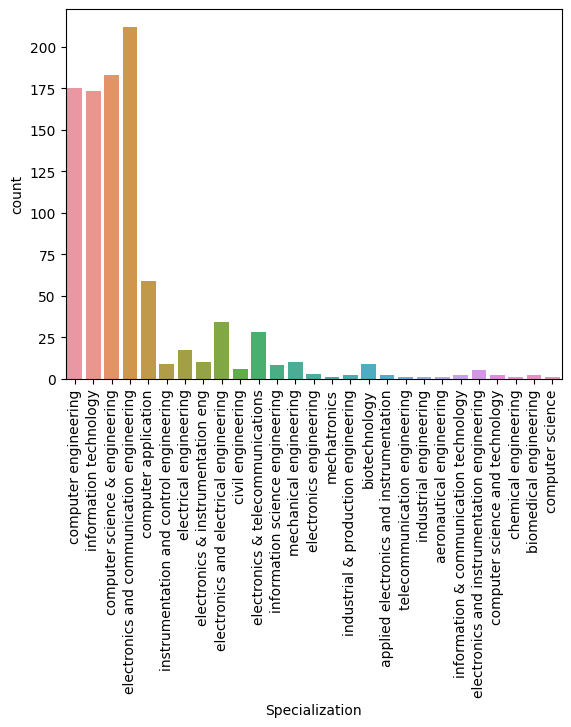

In [155]:
sns.countplot(data=female_df,x='Specialization')
plt.xticks(rotation=90)
plt.show()

In [156]:
male_df = df[df['Gender']=='m']

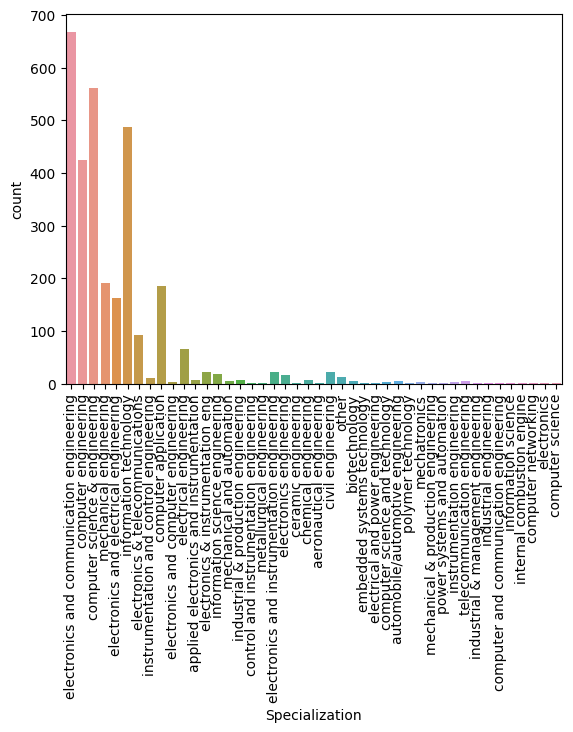

In [157]:
sns.countplot(data=male_df,x='Specialization')
plt.xticks(rotation=90)
plt.show()

In [159]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [160]:
df.groupby(by=['Gender'])['Specialization'].value_counts()

Gender  Specialization                             
f       electronics and communication engineering      212
        computer science & engineering                 183
        computer engineering                           175
        information technology                         173
        computer application                            59
        electronics and electrical engineering          34
        electronics & telecommunications                28
        electrical engineering                          17
        electronics & instrumentation eng               10
        mechanical engineering                          10
        biotechnology                                    9
        instrumentation and control engineering          9
        information science engineering                  8
        civil engineering                                6
        electronics and instrumentation engineering      5
        electronics engineering                          3
    

From both the gender ECE specialization tops the list.

Does high CollegeGPA result in high Salary?

In [164]:
df['collegeGPA'].corr(df['Salary'])

0.13010251907112563

<Axes: xlabel='collegeGPA', ylabel='Salary'>

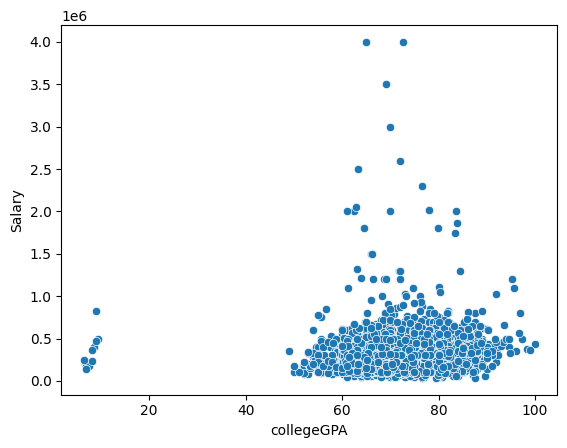

In [165]:
sns.scatterplot(data=df,x='collegeGPA',y='Salary')

In [168]:
df['collegeGPA'].sort_values()

3308     6.45
138      6.63
788      6.80
1419     6.85
2151     6.95
1767     7.56
1439     8.07
2229     8.13
7        8.58
2662     8.88
2691     8.89
2293     9.30
2836    49.07
3448    50.00
907     50.00
3293    51.00
1400    51.80
324     52.00
3590    52.00
2410    52.00
968     52.00
2125    52.00
3790    53.00
2206    53.00
143     53.00
854     53.01
3188    53.25
2953    53.30
2306    54.00
1818    54.00
1131    54.00
3784    54.00
993     54.00
3039    54.00
1229    54.00
3407    54.00
2942    54.43
1708    54.54
1991    54.68
707     54.75
2105    54.75
1860    55.00
3357    55.00
1158    55.00
3669    55.00
2175    55.00
3571    55.00
2209    55.00
3425    55.00
1586    55.00
1024    55.00
563     55.00
83      55.00
2301    55.00
3132    55.00
3823    55.00
2556    55.00
59      55.00
2070    55.07
1979    55.09
133     55.33
878     55.45
2702    55.50
2799    55.50
23      55.52
1074    55.55
1757    55.56
3095    55.60
2223    55.60
1756    55.60
1058    55.70
382   

In [170]:
df['collegeGPA'] = df['collegeGPA'].apply(lambda x: x * 10 if x < 10 else x)

In [171]:
df['collegeGPA'].sort_values()

2836    49.07
907     50.00
3448    50.00
3293    51.00
1400    51.80
3590    52.00
968     52.00
324     52.00
2125    52.00
2410    52.00
2206    53.00
3790    53.00
143     53.00
854     53.01
3188    53.25
2953    53.30
1818    54.00
3039    54.00
993     54.00
3407    54.00
1229    54.00
3784    54.00
1131    54.00
2306    54.00
2942    54.43
1708    54.54
1991    54.68
707     54.75
2105    54.75
2301    55.00
1586    55.00
3357    55.00
2209    55.00
83      55.00
1024    55.00
3132    55.00
563     55.00
2175    55.00
1860    55.00
3669    55.00
3425    55.00
3571    55.00
2556    55.00
3823    55.00
1158    55.00
59      55.00
2070    55.07
1979    55.09
133     55.33
878     55.45
2702    55.50
2799    55.50
23      55.52
1074    55.55
1757    55.56
2223    55.60
1756    55.60
3095    55.60
382     55.70
1058    55.70
733     55.89
452     55.90
730     56.00
1423    56.00
3693    56.00
2626    56.00
2037    56.00
3454    56.04
2497    56.10
2102    56.24
2727    56.36
1090  

In [172]:
df['collegeGPA'].corr(df['Salary'])

0.14831774929008582

<Axes: xlabel='collegeGPA', ylabel='Salary'>

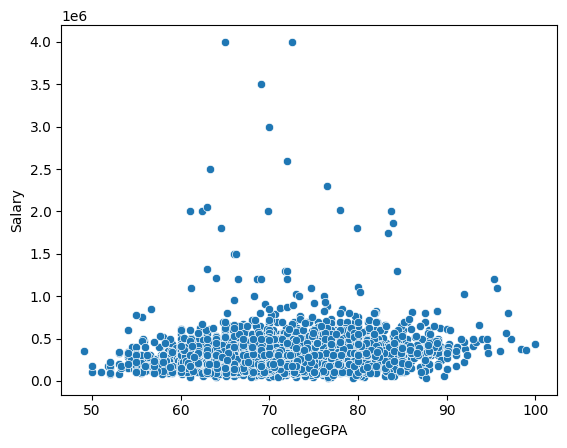

In [173]:
sns.scatterplot(data=df,x='collegeGPA',y='Salary')

We cannot conclude College GPA has strong impact on salary, although it has some slight positive correlation.

Do candidates from CollegeTier 1 have significantly higher salaries compared to those from other tiers?

In [176]:
df['CollegeTier'].value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

In [178]:
tier1_salaries = df[df['CollegeTier'] == 1]['Salary']
other_tiers_salaries = df[df['CollegeTier'] != 1]['Salary']

f_stat, p_value = f_oneway(tier1_salaries, other_tiers_salaries)
print("ANOVA test p-value:", p_value)

ANOVA test p-value: 3.018247144438326e-30


The p-value less than 0.05 indicates significant differences between the tiers.

<Axes: xlabel='CollegeTier', ylabel='Salary'>

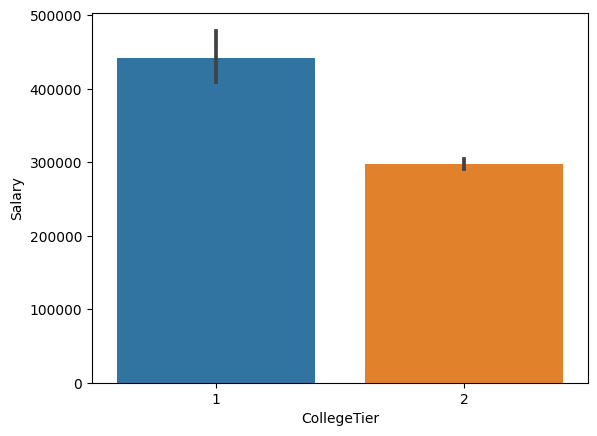

In [179]:
sns.barplot(data=df,x='CollegeTier',y='Salary')

In [180]:
df.groupby(by='CollegeTier')['Salary'].mean()

CollegeTier
1    442356.902357
2    296893.812483
Name: Salary, dtype: float64

Yes, graduates from Tier 1 colleges have significantly higher salaries

Is there a significant difference in salaries between male and female candidates?

In [194]:
male_salaries = df[df['Gender'] == 'm']['Salary']
female_salaries = df[df['Gender'] == 'f']['Salary']

t_stat, p_value = ttest_ind(male_salaries, female_salaries)
print("t-test p-value:", p_value)

t-test p-value: 0.03332394177012777


The p-value less than 0.05 indicates significant salary differences between genders.

<Axes: xlabel='Gender'>

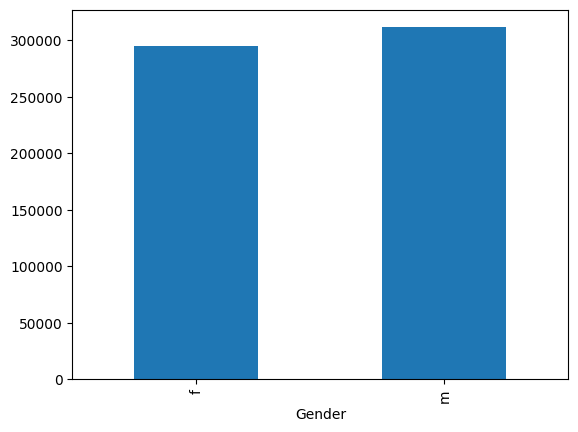

In [197]:
df.groupby(by=['Gender'])['Salary'].mean().plot(kind='bar')

In [203]:
df.groupby(by=['Gender'])['Salary'].mean()

Gender
f    294937.304075
m    311716.211772
Name: Salary, dtype: float64

Male earn higher than female on average.

Do candidates with certain Specializations have higher salaries on average?

In [200]:
df.groupby(by=['Specialization'])['Salary'].mean().sort_values(ascending=False)

Specialization
polymer technology                             700000.000000
computer networking                            565000.000000
information science                            460000.000000
instrumentation and control engineering        394000.000000
information & communication technology         387500.000000
industrial & production engineering            384500.000000
civil engineering                              381206.896552
computer engineering                           374100.000000
industrial engineering                         370000.000000
chemical engineering                           370000.000000
electronics & instrumentation eng              364531.250000
internal combustion engine                     360000.000000
applied electronics and instrumentation        348333.333333
telecommunication engineering                  342500.000000
metallurgical engineering                      337500.000000
ceramic engineering                            335000.000000
electroni

In [202]:
specialization_salaries = df.groupby('Specialization')['Salary'].apply(list)

f_stat, p_value = f_oneway(*specialization_salaries)
print("ANOVA test p-value:", p_value)

ANOVA test p-value: 8.363226896948822e-08


The p-value less than 0.05 indicates significant salary differences based on specialization.

Top 5 average salaries earned based on specialization.

polymer technology                             700000.000000

computer networking                            565000.000000

information science                            460000.000000

instrumentation and control engineering        394000.000000

information & communication technology         387500.000000

Yes, Salary is dependent on Specialization.